In [35]:
import pandas as pd
import scanpy as sc
import spatialdata



crosstab_df = list()


for Tissue, TableFolder in [["Region1","REGION1_TABLES"],["Region2","REGION2_TABLES"],["Region3","REGION3_TABLES"],["Region4","REGION4_TABLES"]]:
    in_out_path = f"/Volumes/ProstateCancerEvo_SpatialAnalysis/dbs/Ongoing/{Tissue}/{TableFolder}"

    adata_xenium_p = f"{in_out_path}/{Tissue}_Xenium_Phen_HE_Integrated.Xenium_Process_Table.V2.h5ad"

    outfile = adata_xenium_p.replace(".V2",".Cell_Type_Annotated.V3")
    crosstab_df.append(pd.read_csv(outfile.replace(".h5ad",".crosstab.csv")))

In [36]:
crosstab_df

[                                     cell_type_manuel        CD4        CD8  \
 0                      premature_B_Cells_CD20_Region1   0.000000   0.000000   
 1         CD68_Monocytes_has_CD34_AND_T_Cells_Region1   0.000000   0.000000   
 2   CD8_Effector_AND_CD4_Helper_CD45_PanMarker_Reg...  18.576389  41.468254   
 3                       Smooth_Muscle_Cells_5_Region1   0.000000   0.000000   
 4                       Smooth_Muscle_Cells_1_Region1   0.000000   0.000000   
 5                       Smooth_Muscle_Cells_2_Region1   0.000000   0.000000   
 6                       Smooth_Muscle_Cells_3_Region1   0.000000   0.000000   
 7                                     Tumor_1_Region1   0.000000   0.000000   
 8                                     Tumor_2_Region1   0.000000   0.000000   
 9                                    ;Tumor_3_Region1   0.000000   0.000000   
 10               Progenitor_Stem_Cells_Unsure_Region1   0.000000   0.000000   
 11                        Luminal_Epith

In [37]:

import pandas as pd

# 1. Concatenate along rows (axis=0)
combined_ct = pd.concat(crosstab_df, axis=0,ignore_index=False)

# 2. (Optional) If you want to keep track of the source for each chunk,
#    you can add a key:
combined_ct_with_keys = pd.concat(
    crosstab_df,
    axis=0,
    keys=[f"ct_{i}" for i in range(len(crosstab_df))],
)

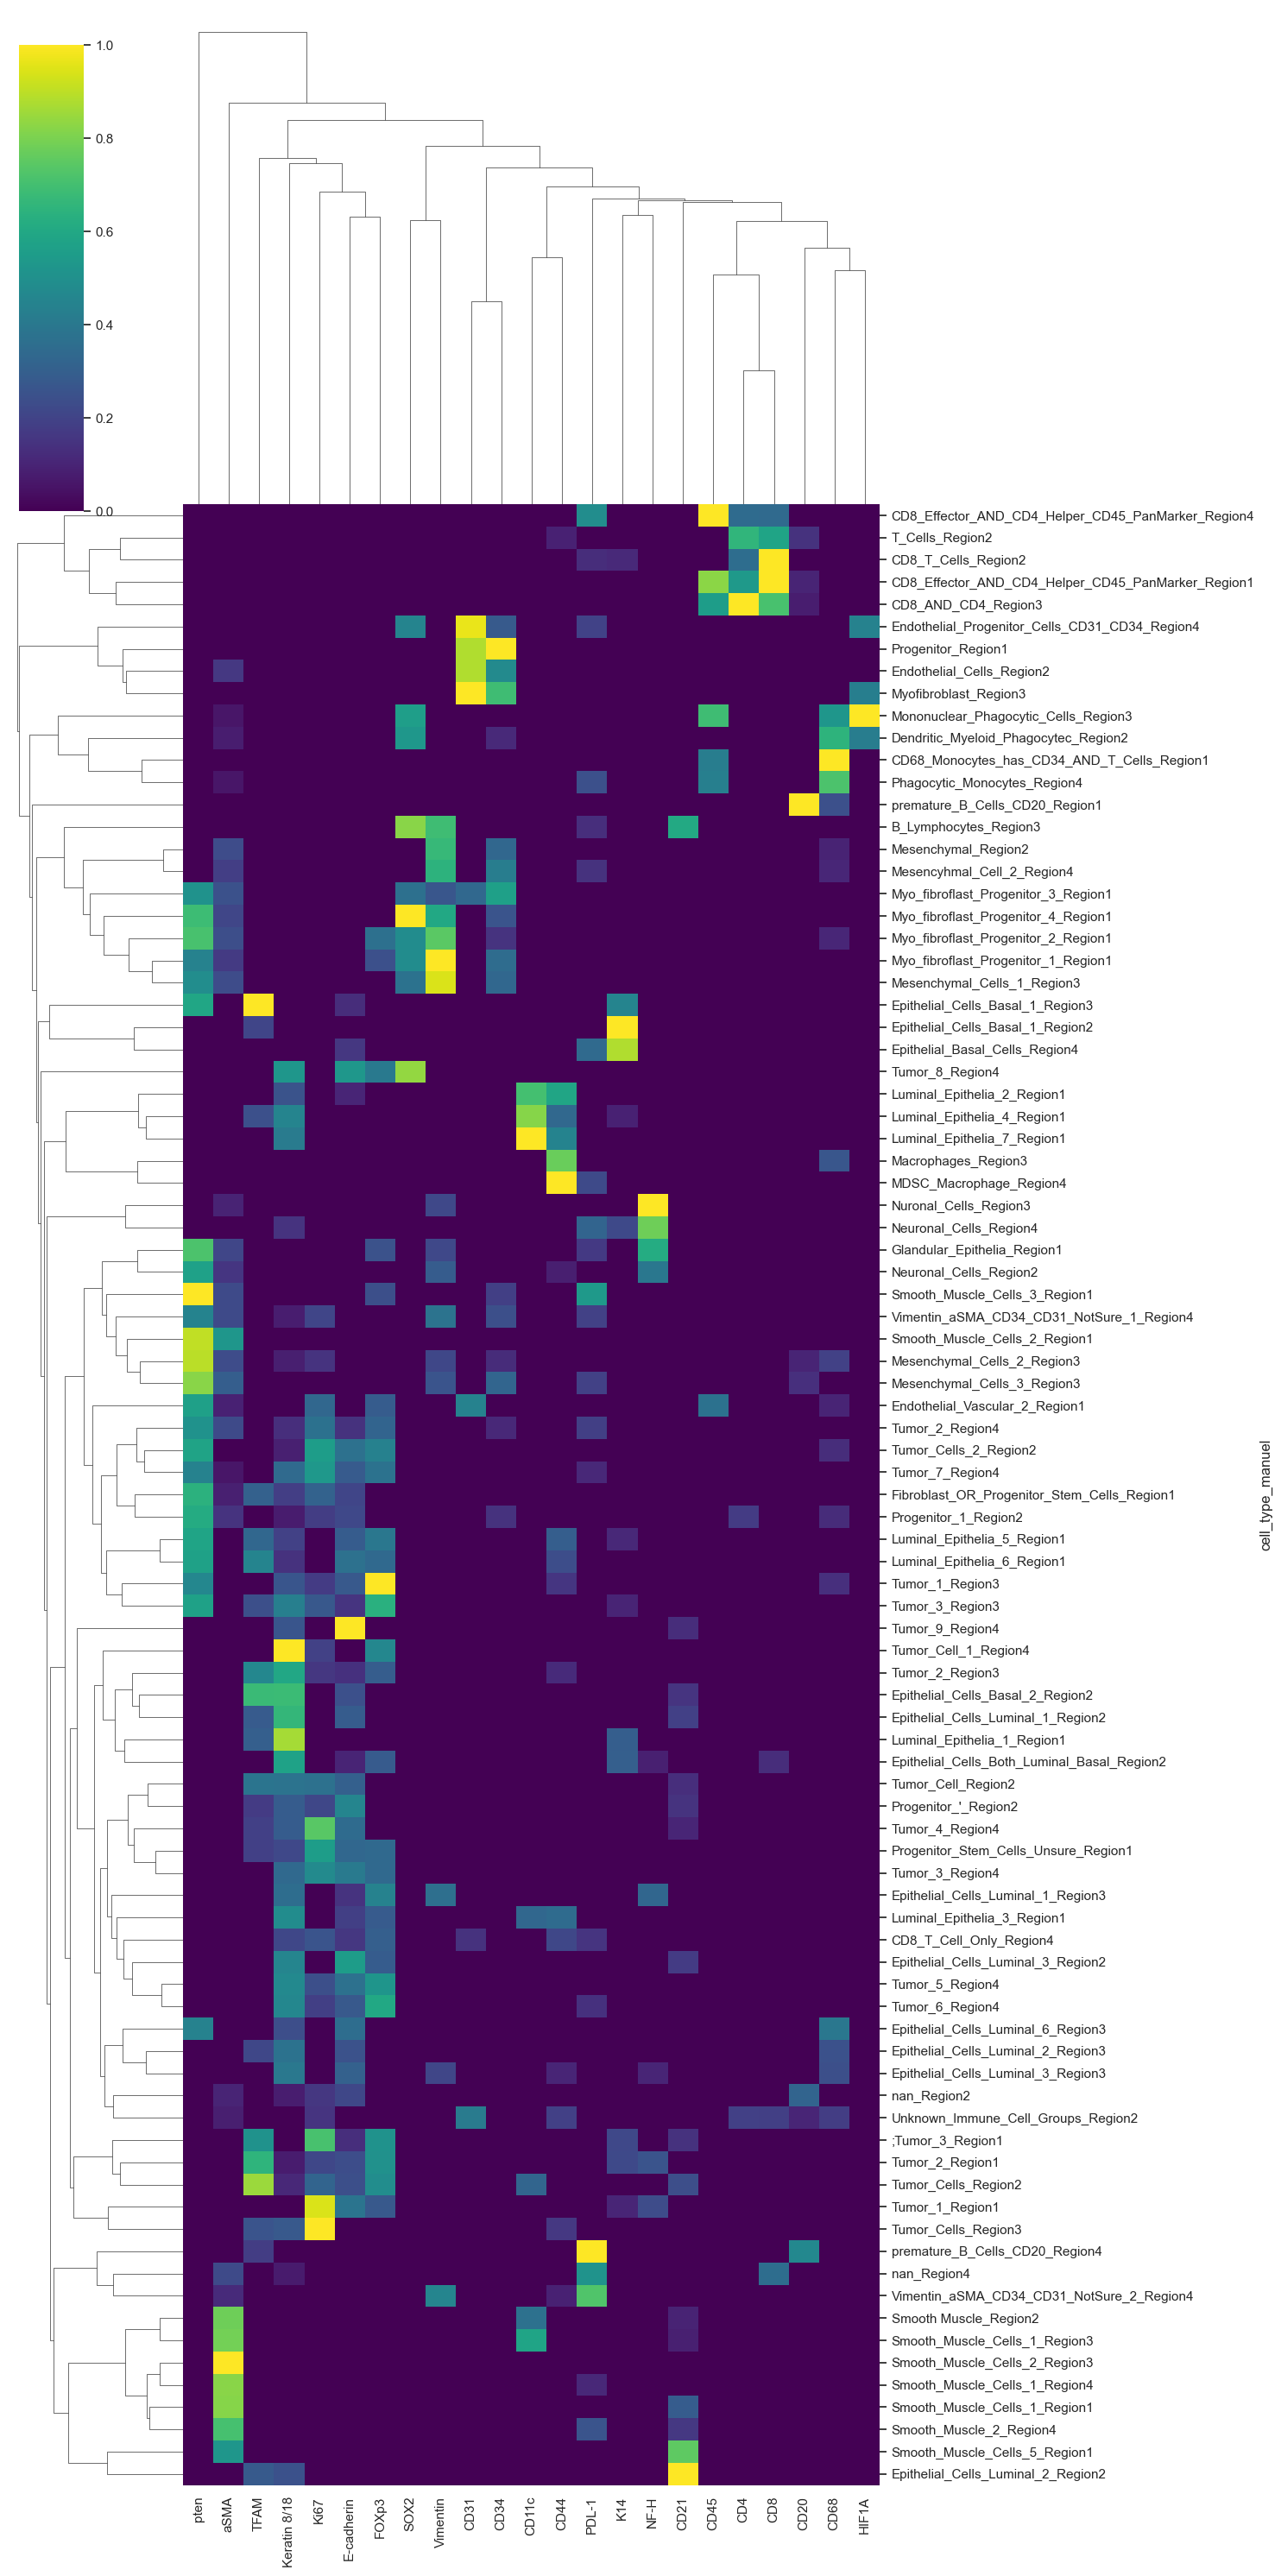

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Copy your DataFrame
df = combined_ct.copy()

# 2) If you still have 'leiden' as a column, set it as the index and drop it
if 'cell_type_manuel' in df.columns:
    df = df.set_index('cell_type_manuel')

# 3) Ensure all remaining columns are numeric
df = df.astype(float)

# 4) Now plot
sns.set(context="notebook", style="white")
g = sns.clustermap(
    df,
    metric="euclidean",
    method="average",
    cmap="viridis",
    standard_scale=1,
    figsize=(15, 30)
)

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()